In [1]:
# Import Required Libraries for Data Generation
import pandas as pd
import numpy as np
from faker import Faker
import random, string
from datetime import datetime, timedelta,date
# Generate Synthetic Data for EV Fleet Monitoring
# Initialize Faker object
fake = Faker()
# Store existing vehicle IDs to ensure uniqueness
existing_vehicle_ids = set()
# Function to generate unique Vehicle ID
def generate_unique_vehicle_id(prefix, length=3):
    while True:
        vehicle_id = prefix + ''.join(random.choices(string.digits, k=length))
        if vehicle_id not in existing_vehicle_ids:
            existing_vehicle_ids.add(vehicle_id)  # Ensure uniqueness
            return vehicle_id

# Function to generate Driver ID (no uniqueness check)
def generate_driver_id(prefix, length=3):
    return prefix + ''.join(random.choices(string.digits, k=length))
# Number of entries you want in your dataset
num_records = 1000

# Set maximum possible range (based on assumptions about the EV fleet)
max_range_km = 500  # Maximum range (in kilometers) for a fully charged battery
avg_energy_consumption_per_km = 0.15  # kWh per km, for simplicity (can vary based on vehicle model)

# List of EV Models (you can add more if needed)
# vehicle_models = [
#     "Tesla Model 3", "Nissan Leaf", "Hyundai Kona EV", "BMW i3", "Audi e-tron", "Volkswagen ID.4",
#     "Kia Soul EV", "Ford Mustang Mach-E", "Chevrolet Bolt EV", "Porsche Taycan", "Jaguar I-Pace", 
#     "Mini Cooper SE", "Tesla Model S", "Renault Zoe", "Peugeot e-208", "Honda e", "Volvo XC40 Recharge",
#     "Mercedes EQC", "Mazda MX-30", "Opel Corsa-e", "Rivian R1T", "Skoda Enyaq iV", "Toyota bZ4X", 
#     "Lucid Air", "Fisker Ocean", "Mercedes EQS", "Nissan Ariya", "Polestar 2", "Audi Q4 e-tron", 
#     "Citroen e-C4", "Smart EQ Forfour", "Peugeot e-2008", "Kia EV6", "BYD Tang EV", "BMW iX3", 
#     "Ford F-150 Lightning", "Volkswagen ID.3", "Tesla Model X", "Honda Clarity", "Hyundai Ioniq EV", 
#     "Lexus UX 300e", "MG ZS EV", "Subaru Solterra", "Tesla Model Y", "XPeng P7", "Rivian R1S", 
#     "Mercedes EQA", "Tesla Cybertruck", "Toyota Mirai"
# ]

# Generate synthetic data for the EV fleet monitoring system
data = []
start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)

for _ in range(num_records):
    # Vehicle ID (unique identifier)
    id =  random.randint(1, 5)   # Generate unique Vehicle ID

    # Driver ID (can repeat)
    # driver_id = generate_driver_id("D", 3)  # Driver ID (no uniqueness check)

    # Simulate random battery level between 15% and 100%
    battery_level = random.randint(15, 100)  # Battery level between 15%-100%

    # Calculate the range using a positive correlation with the battery level (linear)
    range_km = ((battery_level - 15) / (100-15)) * (460 - 20) + 20 + random.uniform(-10, 10) # Scaled range between 20 and 460 km
    range_km = round(range_km, 2)

    # Calculate energy consumed (in kWh)
    energy_consumed = range_km * avg_energy_consumption_per_km  # kWh

    # Calculate the fast charge speed (in kW)
    fast_charge_speed = random.randint(50, 150)  # Fast charge speed between 50 kW and 150 kW

    # Generate Latitude and Longitude specific to India
    latitude = round(random.uniform(8, 37), 6)  # Latitude between 8° and 37° (India specific)
    longitude = round(random.uniform(68, 97), 6)  # Longitude between 68° and 97° (India specific)

    # Simulate other features
    speed = random.randint(40, 120)  # Speed between 40-120 km/h (integer)
    maintenance_cost = random.randint(50, 300)  # Maintenance cost between $50 to $300 (integer)
    charging_cost = random.randint(5, 40)  # Charging cost between $5 to $40 (integer)
    random_date = fake.date_between(start_date=start_date,end_date=end_date)  # Random date within the last decade
    date = random_date.strftime("%y%m%d")
    #  Generate Pin Code (Random 6-digit number in India's pin code range)
    pin_code = random.randint(100000, 999999)

    # Working Condition: 1 (Working), 0 (Not Working) with a 9:1 ratio
    working_condition = random.choices([0, 1], weights=[1, 9], k=1)[0]  # 0: Not Working (10%), 1: Working (90%)

    # Charging/Discharging: 1 (Discharging), 0 (Charging) with a 60% chance for Discharging, 40% for Charging
    charging_status = random.choices([0, 1], weights=[4, 6], k=1)[0]  # 1: Discharging (60%), 0: Charging (40%)

    # Randomly select a model from the list of vehicle models
    # model = random.choice(vehicle_models)
    status = random.randint(0,1)
    # Append generated data row
    data.append([id, range_km, battery_level, latitude, longitude, speed, 
                 maintenance_cost, charging_cost, pin_code, working_condition, charging_status, 
                 energy_consumed, fast_charge_speed, status, date])

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=[
    'id',  
    'Range (km)', 
    'Battery Level (%)', 
    'Latitude (°)', 
    'Longitude (°)', 
    'Speed (km/h)', 
    'Maintenance Cost ($)', 
    'Charging Cost ($)', 
    'Pin Code', 
    'Working Condition', 
    'Charging Status', 
    'Energy Consumed (kWh)', 
    'Fast Charge Speed (kW)',
    'status',
    'Date'
])

# Display the first 20 rows of the DataFrame
df.head(20)
# Check Dataframe Information
df.info()
# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%y%m%d')

# # Split the 'Date' column into 'Day', 'Month', 'Year'
# df['Day'] = df['Date'].dt.day
# df['Month'] = df['Date'].dt.month
# df['Year'] = df['Date'].dt.year

# Drop the original 'Date' column
# df = df.drop(columns=['Date'])

# Display the DataFrame to verify the changes
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   Range (km)              1000 non-null   float64
 2   Battery Level (%)       1000 non-null   int64  
 3   Latitude (°)            1000 non-null   float64
 4   Longitude (°)           1000 non-null   float64
 5   Speed (km/h)            1000 non-null   int64  
 6   Maintenance Cost ($)    1000 non-null   int64  
 7   Charging Cost ($)       1000 non-null   int64  
 8   Pin Code                1000 non-null   int64  
 9   Working Condition       1000 non-null   int64  
 10  Charging Status         1000 non-null   int64  
 11  Energy Consumed (kWh)   1000 non-null   float64
 12  Fast Charge Speed (kW)  1000 non-null   int64  
 13  status                  1000 non-null   int64  
 14  Date                    1000 non-null   o

,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),Pin Code,Working Condition,Charging Status,Energy Consumed (kWh),Fast Charge Speed (kW),status,Date
0,4,369.92,82,29.639139,72.127519,112,127,15,909671,1,0,55.4880,105,0,2023-12-15
1,5,157.64,42,31.784737,95.084221,84,277,11,152139,1,0,23.6460,111,0,2023-10-20
2,3,126.41,34,33.514378,77.518694,114,142,32,413463,1,1,18.9615,94,1,2023-01-28
3,2,42.12,20,22.681663,87.277308,59,278,36,859599,1,1,6.3180,110,0,2023-09-09
4,2,362.27,82,21.496435,96.520521,70,213,35,692526,0,1,54.3405,130,0,2023-11-14
5,3,181.50,48,19.982642,80.853734,112,271,20,681281,1,0,27.2250,98,0,2023-10-30
6,3,258.34,61,24.940851,81.611704,111,296,13,614902,1,0,38.7510,113,0,2023-07-22
7,4,287.55,67,31.542029,86.974717,108,55,18,651907,1,0,43.1325,116,0,2023-05-03
8,1,300.09,71,15.208502,90.978083,43,279,36,964533,0,1,45.0135,51,0,2023-06-17
9,2,90.03,30,13.515241,87.962357,107,118,35,433246,1,0,13.5045,65,1,2023-11-08


In [3]:
syn_data =df

In [5]:
syn_data

,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),Pin Code,Working Condition,Charging Status,Energy Consumed (kWh),Fast Charge Speed (kW),status,Date
0,4,369.92,82,29.639139,72.127519,112,127,15,909671,1,0,55.4880,105,0,2023-12-15
1,5,157.64,42,31.784737,95.084221,84,277,11,152139,1,0,23.6460,111,0,2023-10-20
2,3,126.41,34,33.514378,77.518694,114,142,32,413463,1,1,18.9615,94,1,2023-01-28
3,2,42.12,20,22.681663,87.277308,59,278,36,859599,1,1,6.3180,110,0,2023-09-09
4,2,362.27,82,21.496435,96.520521,70,213,35,692526,0,1,54.3405,130,0,2023-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,287.36,65,23.413756,91.847536,45,136,14,375967,1,1,43.1040,53,0,2023-07-27
996,3,356.11,81,8.052059,94.827096,50,221,33,885307,1,0,53.4165,90,1,2023-05-25
997,2,264.92,62,30.101488,73.192230,72,239,38,921892,1,1,39.7380,144,0,2023-10-07
998,1,437.63,96,27.438263,70.993328,50,190,26,613458,1,1,65.6445,86,1,2023-12-25


In [7]:
true_data= pd.read_csv('vehicleds.csv')

true_data 

,id,dvr,Make,mgr,Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1,deepak,Tesla1,Mark,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1,2,dinesh,Tesla2,vettal,3.3,261,460,377,660,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
2,3,varun,BMW,sainz,5.7,190,470,250,430,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
3,4,chandu,Volkswagen,john,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
4,5,mahendra,Polestar,mathew,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405,5
5,1,shwetha,Tesla1,Mark,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
6,2,praveen,Tesla2,vettal,3.3,261,460,377,660,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
7,3,shruthi,BMW,sainz,5.7,190,470,250,430,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
8,4,dhoni,Volkswagen,john,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
9,5,kohli,Polestar,mathew,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405,5


In [9]:
# true_data.loc[true_data['id'] == 1, 'mgr'] = 'Dinesh'
# true_data.loc[true_data['id'] == 2, 'mgr'] = 'Sahana'
# true_data.loc[true_data['id'] == 3, 'mgr'] = 'Vishwa'
# true_data.loc[true_data['id'] == 4, 'mgr'] = 'Chaitanya'
# true_data.loc[true_data['id'] == 5, 'mgr'] = 'Anshika'

In [11]:
true_data

,id,dvr,Make,mgr,Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1,deepak,Tesla1,Mark,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1,2,dinesh,Tesla2,vettal,3.3,261,460,377,660,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
2,3,varun,BMW,sainz,5.7,190,470,250,430,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
3,4,chandu,Volkswagen,john,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
4,5,mahendra,Polestar,mathew,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405,5
5,1,shwetha,Tesla1,Mark,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
6,2,praveen,Tesla2,vettal,3.3,261,460,377,660,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
7,3,shruthi,BMW,sainz,5.7,190,470,250,430,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
8,4,dhoni,Volkswagen,john,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
9,5,kohli,Polestar,mathew,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405,5


In [13]:
data = pd.merge(syn_data,true_data, on="id")

In [9]:
data

,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),Pin Code,...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,0,4,369.92,82,29.639139,72.127519,112,127,15,909671,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
1,1,4,369.92,82,29.639139,72.127519,112,127,15,909671,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
2,2,5,157.64,42,31.784737,95.084221,84,277,11,152139,...,Front,78.0,4607,1800,1479,2735,2490,496,405,5
3,3,5,157.64,42,31.784737,95.084221,84,277,11,152139,...,Front,78.0,4607,1800,1479,2735,2490,496,405,5
4,4,3,126.41,34,33.514378,77.518694,114,142,32,413463,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2,264.92,62,30.101488,73.192230,72,239,38,921892,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1996,1996,1,437.63,96,27.438263,70.993328,50,190,26,613458,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1997,1997,1,437.63,96,27.438263,70.993328,50,190,26,613458,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1998,1998,4,241.99,58,13.053547,80.330529,80,261,40,282731,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           2000 non-null   int64         
 1   Range (km)                   2000 non-null   float64       
 2   Battery Level (%)            2000 non-null   int64         
 3   Latitude (°)                 2000 non-null   float64       
 4   Longitude (°)                2000 non-null   float64       
 5   Speed (km/h)                 2000 non-null   int64         
 6   Maintenance Cost ($)         2000 non-null   int64         
 7   Charging Cost ($)            2000 non-null   int64         
 8   Pin Code                     2000 non-null   int64         
 9   Working Condition            2000 non-null   int64         
 10  Charging Status              2000 non-null   int64         
 11  Energy Consumed (kWh)        2000 non-null 

In [17]:
list(data)

['id',
 'Range (km)',
 'Battery Level (%)',
 'Latitude (°)',
 'Longitude (°)',
 'Speed (km/h)',
 'Maintenance Cost ($)',
 'Charging Cost ($)',
 'Pin Code',
 'Working Condition',
 'Charging Status',
 'Energy Consumed (kWh)',
 'Fast Charge Speed (kW)',
 'status',
 'Date',
 'dvr',
 'Make',
 'mgr',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Seats']

In [19]:
data['dvr'].unique()

array(['chandu', 'dhoni', 'mahendra', 'kohli', 'varun', 'shruthi',
       'dinesh', 'praveen', 'deepak', 'shwetha'], dtype=object)

In [21]:
data['mgr'].unique()

array(['john', 'mathew', 'sainz', 'vettal', 'Mark'], dtype=object)

In [11]:
data.groupby(['Make']).count()

,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),Pin Code,...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
Make,,,,,,,,,,,,,,,,,,,,,
BMW,372,372,372,372,372,372,372,372,372,372,...,372,372,372,372,372,372,372,372,372,372
Polestar,386,386,386,386,386,386,386,386,386,386,...,386,386,386,386,386,386,386,386,386,386
Tesla1,424,424,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
Tesla2,408,408,408,408,408,408,408,408,408,408,...,408,408,408,408,408,408,408,408,408,408
Volkswagen,410,410,410,410,410,410,410,410,410,410,...,410,410,410,410,410,410,410,410,410,410


In [13]:
data.groupby(['status']).count()

,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),Pin Code,...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
status,,,,,,,,,,,,,,,,,,,,,
0,986,986,986,986,986,986,986,986,986,986,...,986,986,986,986,986,986,986,986,986,986
1,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014


In [27]:
data.groupby(['status','Make']).count()

id  Range (km)  Battery Level (%)  Latitude (°)  \
status Make                                                           
0      BMW         168         168                168           168   
       Polestar    180         180                180           180   
       Tesla1      212         212                212           212   
       Tesla2      210         210                210           210   
       Volkswagen  216         216                216           216   
1      BMW         204         204                204           204   
       Polestar    206         206                206           206   
       Tesla1      212         212                212           212   
       Tesla2      198         198                198           198   
       Volkswagen  194         194                194           194   

                   Longitude (°)  Speed (km/h)  Maintenance Cost ($)  \
status Make                                                            
0      BMW                   168           168                   168   
       Polestar              180           180                   180   
       Tesla1                212           212                   212   
       Tesla2                210           210                   210   
       Volkswagen            216           216                   216   
1      BMW                   204           204                   204   
       Polestar              206           206                   206   
       Tesla1                212           212                   212   
       Tesla2                198           198                   198   
       Volkswagen            194           194                   194   

                   Charging Cost ($)  Pin Code  Working Condition  ...  Drive  \
status Make                                                        ...          
0      BMW                       168       168                168  ...    168   
       Polestar                  180       180                180  ...    180   
       Tesla1                    212       212                212  ...    212   
       Tesla2                    210       210                210  ...    210   
       Volkswagen                216       216                216  ...    216   
1      BMW                       204       204                204  ...    204   
       Polestar                  206       206                206  ...    206   
       Tesla1                    212       212                212  ...    212   
       Tesla2                    198       198                198  ...    198   
       Volkswagen                194       194                194  ...    194   

                    BC  Length  Width  Height  Wheelbase  \
status Make                                                
0      BMW         168     168    168     168        168   
       Polestar    180     180    180     180        180   
       Tesla1      212     212    212     212        212   
       Tesla2      210     210    210     210        210   
       Volkswagen  216     216    216     216        216   
1      BMW         204     204    204     204        204   
       Polestar    206     206    206     206        206   
       Tesla1      212     212    212     212        212   
       Tesla2      198     198    198     198        198   
       Volkswagen  194     194    194     194        194   

                   Gross Vehicle Weight (GVWR)  Max. Payload  Cargo Volume  \
status Make                                                                  
0      BMW                                 168           168           168   
       Polestar                            180           180           180   
       Tesla1                              212           212           212   
       Tesla2                              210           210           210   
       Volkswagen                          216           216           216   
1      BMW                                 204           204  

In [15]:
status_make = data.groupby(['Make', 'status'])['Date'].max().reset_index()

In [17]:
status_make

,Make,status,Date
0,BMW,0,2023-12-27
1,BMW,1,2023-12-30
2,Polestar,0,2023-12-20
3,Polestar,1,2023-12-28
4,Tesla1,0,2023-12-30
5,Tesla1,1,2023-12-25
6,Tesla2,0,2023-12-23
7,Tesla2,1,2023-12-23
8,Volkswagen,0,2023-12-28
9,Volkswagen,1,2023-12-25


In [33]:
status_dvr = data.groupby(['dvr', 'status'])['Date'].max().reset_index()

In [35]:
status_dvr

,dvr,status,Date
0,chandu,0,2023-12-28
1,chandu,1,2023-12-25
2,deepak,0,2023-12-30
3,deepak,1,2023-12-25
4,dhoni,0,2023-12-28
5,dhoni,1,2023-12-25
6,dinesh,0,2023-12-23
7,dinesh,1,2023-12-23
8,kohli,0,2023-12-20
9,kohli,1,2023-12-28


In [19]:
# Find the index of the last day for each driver grouped by 'make' and 'status'
last_day_indices = (
    data.loc[data.groupby([ 'dvr'])['Date'].idxmax()]
)
status_dvr_last_date = last_day_indices.reset_index(drop=True)

In [21]:
status_dvr_last_date[['dvr','status','Date']]

,dvr,status,Date
0,chandu,0,2023-12-28
1,deepak,0,2023-12-30
2,dhoni,0,2023-12-28
3,dinesh,0,2023-12-23
4,kohli,1,2023-12-28
5,mahendra,1,2023-12-28
6,praveen,0,2023-12-23
7,shruthi,1,2023-12-30
8,shwetha,0,2023-12-30
9,varun,1,2023-12-30


In [3]:
import pandas as pd
import numpy as np
from faker import Faker
import random, string
from datetime import datetime, timedelta,date

In [25]:
data.to_csv('final_merged_data.csv')

In [27]:
data= pd.read_csv('final_merged_data.csv')

In [29]:
data

,Unnamed: 0.1,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,0,0,4,369.92,82,29.639139,72.127519,112,127,15,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
1,1,1,4,369.92,82,29.639139,72.127519,112,127,15,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
2,2,2,5,157.64,42,31.784737,95.084221,84,277,11,...,Front,78.0,4607,1800,1479,2735,2490,496,405,5
3,3,3,5,157.64,42,31.784737,95.084221,84,277,11,...,Front,78.0,4607,1800,1479,2735,2490,496,405,5
4,4,4,3,126.41,34,33.514378,77.518694,114,142,32,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,2,264.92,62,30.101488,73.192230,72,239,38,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1996,1996,1996,1,437.63,96,27.438263,70.993328,50,190,26,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1997,1997,1997,1,437.63,96,27.438263,70.993328,50,190,26,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1998,1998,1998,4,241.99,58,13.053547,80.330529,80,261,40,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 2000 non-null   int64  
 1   Unnamed: 0                   2000 non-null   int64  
 2   id                           2000 non-null   int64  
 3   Range (km)                   2000 non-null   float64
 4   Battery Level (%)            2000 non-null   int64  
 5   Latitude (°)                 2000 non-null   float64
 6   Longitude (°)                2000 non-null   float64
 7   Speed (km/h)                 2000 non-null   int64  
 8   Maintenance Cost ($)         2000 non-null   int64  
 9   Charging Cost ($)            2000 non-null   int64  
 10  Pin Code                     2000 non-null   int64  
 11  Working Condition            2000 non-null   int64  
 12  Charging Status              2000 non-null   int64  
 13  Energy Consumed (k

In [33]:
models = {'Tesla':['Tesla Model S','Tesla Model 3','Tesla Model X','Tesla Model Y'],
          'BMW':['BMW i4','BMW iX','BMW i7','BMW iX1','BMW iX3'],
          'Volkswagen':['Volkswagen ID.3','Volkswagen ID.4','Volkswagen ID.5','Volkswagen ID. Buzz','Volkswagen e-Up!'],
          'Polestar':['Polestar 2']}

In [35]:
dff = data

In [37]:
dff.describe()

,Unnamed: 0.1,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),...,Total Torque,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,999.500000,999.500000,2.963000,238.602910,57.24800,22.127136,82.062144,79.555000,178.431000,22.022000,...,446.376000,81.581400,4604.998000,1831.901000,1476.503000,2823.126000,2365.112000,452.001000,477.886000,5.0
std,577.494589,577.494589,1.424305,129.060688,24.88727,8.208525,8.384400,23.630831,74.303013,10.101809,...,127.495028,1.893681,182.933716,22.381726,48.338601,58.120591,148.205749,63.702527,75.379693,0.0
min,0.000000,0.000000,1.000000,15.100000,15.00000,8.009697,68.025203,40.000000,50.000000,5.000000,...,310.000000,78.000000,4261.000000,1800.000000,1443.000000,2735.000000,2232.000000,388.000000,385.000000,5.0
25%,499.750000,499.750000,2.000000,126.447500,35.00000,15.257800,74.814786,60.000000,112.000000,13.000000,...,330.000000,82.000000,4607.000000,1809.000000,1443.000000,2771.000000,2232.000000,388.000000,405.000000,5.0
50%,999.500000,999.500000,3.000000,235.780000,57.00000,22.083751,82.446253,79.000000,182.000000,22.000000,...,430.000000,82.000000,4694.000000,1849.000000,1448.000000,2856.000000,2300.000000,447.000000,470.000000,5.0
75%,1499.250000,1499.250000,4.000000,345.465000,78.00000,29.198300,89.059555,100.000000,245.250000,30.000000,...,493.000000,82.000000,4694.000000,1849.000000,1479.000000,2875.000000,2490.000000,496.000000,561.000000,5.0
max,1999.000000,1999.000000,5.000000,469.150000,100.00000,36.984998,96.917459,120.000000,300.000000,40.000000,...,660.000000,83.900000,4783.000000,1852.000000,1568.000000,2875.000000,2605.000000,555.000000,561.000000,5.0


In [39]:
dff['Range (km)'] = dff['Range (km)'].apply(lambda x: x*1.20 if x< 223 else x*0.75)

In [41]:
dff.describe()

,Unnamed: 0.1,Unnamed: 0,id,Range (km),Battery Level (%),Latitude (°),Longitude (°),Speed (km/h),Maintenance Cost ($),Charging Cost ($),...,Total Torque,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,999.500000,999.500000,2.963000,204.052836,57.24800,22.127136,82.062144,79.555000,178.431000,22.022000,...,446.376000,81.581400,4604.998000,1831.901000,1476.503000,2823.126000,2365.112000,452.001000,477.886000,5.0
std,577.494589,577.494589,1.424305,83.675606,24.88727,8.208525,8.384400,23.630831,74.303013,10.101809,...,127.495028,1.893681,182.933716,22.381726,48.338601,58.120591,148.205749,63.702527,75.379693,0.0
min,0.000000,0.000000,1.000000,18.120000,15.00000,8.009697,68.025203,40.000000,50.000000,5.000000,...,310.000000,78.000000,4261.000000,1800.000000,1443.000000,2735.000000,2232.000000,388.000000,385.000000,5.0
25%,499.750000,499.750000,2.000000,151.737000,35.00000,15.257800,74.814786,60.000000,112.000000,13.000000,...,330.000000,82.000000,4607.000000,1809.000000,1443.000000,2771.000000,2232.000000,388.000000,405.000000,5.0
50%,999.500000,999.500000,3.000000,212.118000,57.00000,22.083751,82.446253,79.000000,182.000000,22.000000,...,430.000000,82.000000,4694.000000,1849.000000,1448.000000,2856.000000,2300.000000,447.000000,470.000000,5.0
75%,1499.250000,1499.250000,4.000000,261.830250,78.00000,29.198300,89.059555,100.000000,245.250000,30.000000,...,493.000000,82.000000,4694.000000,1849.000000,1479.000000,2875.000000,2490.000000,496.000000,561.000000,5.0
max,1999.000000,1999.000000,5.000000,351.862500,100.00000,36.984998,96.917459,120.000000,300.000000,40.000000,...,660.000000,83.900000,4783.000000,1852.000000,1568.000000,2875.000000,2605.000000,555.000000,561.000000,5.0


In [43]:
dff.shape

(2000, 35)

In [45]:
data.shape

(2000, 35)

In [47]:
data.to_csv('raw.csv')

In [49]:
# dff.to_csv('manip.csv')

In [51]:
dff.rename(columns={'Range (km)': 'range', 'Speed (km/h)': 'spped'}, inplace=True)

In [53]:
dff.rename(columns={'spped': 'speed'}, inplace=True)

In [55]:
overspeed = dff.loc[(data.speed>=100)]

In [57]:
overspeed.head(5)

,Unnamed: 0.1,Unnamed: 0,id,range,Battery Level (%),Latitude (°),Longitude (°),speed,Maintenance Cost ($),Charging Cost ($),...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,0,0,4,277.440,82,29.639139,72.127519,112,127,15,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
1,1,1,4,277.440,82,29.639139,72.127519,112,127,15,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
4,4,4,3,151.692,34,33.514378,77.518694,114,142,32,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
5,5,5,3,151.692,34,33.514378,77.518694,114,142,32,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
10,10,10,3,217.800,48,19.982642,80.853734,112,271,20,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5


In [59]:
overspeed.sort_values(by = ['speed'],ascending = [True])

,Unnamed: 0.1,Unnamed: 0,id,range,Battery Level (%),Latitude (°),Longitude (°),speed,Maintenance Cost ($),Charging Cost ($),...,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
1334,1334,1334,2,296.2125,87,25.941985,72.401523,100,196,23,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
54,54,54,4,50.8920,21,32.990677,68.272928,100,78,19,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
55,55,55,4,50.8920,21,32.990677,68.272928,100,78,19,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
1557,1557,1557,3,239.7825,72,11.656795,78.447223,100,196,16,...,Rear,83.9,4783,1852,1448,2856,2605,555,470,5
1335,1335,1335,2,296.2125,87,25.941985,72.401523,100,196,23,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,32,32,2,78.9600,24,22.458530,74.892586,120,165,31,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5
1811,1811,1811,4,125.8920,31,16.007656,73.791044,120,251,7,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
1810,1810,1810,4,125.8920,31,16.007656,73.791044,120,251,7,...,Rear,82.0,4261,1809,1568,2771,2300,447,385,5
519,519,519,2,49.7400,21,17.347234,89.407145,120,139,29,...,AWD,82.0,4694,1849,1443,2875,2232,388,561,5


In [61]:
dff.to_csv('manipulated.csv')

In [63]:
data1 = dff.drop(['Unnamed: 0','Maintenance Cost ($)','Charging Cost ($)','id','status','Date','dvr','mgr','Seats','Latitude (°)','Longitude (°)','Pin Code','speed'],axis=1)

In [65]:
data1 = data1.drop([],axis=1)

In [67]:
list(data1)

['Unnamed: 0.1',
 'range',
 'Battery Level (%)',
 'Working Condition',
 'Charging Status',
 'Energy Consumed (kWh)',
 'Fast Charge Speed (kW)',
 'Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

In [69]:
 data1 = dff[['range',
 'Battery Level (%)','Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']]


In [71]:
data1

,range,Battery Level (%),Make,Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume
0,277.4400,82,Volkswagen,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385
1,277.4400,82,Volkswagen,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385
2,189.1680,42,Polestar,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405
3,189.1680,42,Polestar,7.4,160,425,170,330,Front,78.0,4607,1800,1479,2735,2490,496,405
4,151.6920,34,BMW,5.7,190,470,250,430,Rear,83.9,4783,1852,1448,2856,2605,555,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,198.6900,62,Tesla2,3.3,261,460,377,660,AWD,82.0,4694,1849,1443,2875,2232,388,561
1996,328.2225,96,Tesla1,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561
1997,328.2225,96,Tesla1,4.4,233,485,366,493,AWD,82.0,4694,1849,1443,2875,2232,388,561
1998,181.4925,58,Volkswagen,7.9,160,450,150,310,Rear,82.0,4261,1809,1568,2771,2300,447,385


In [73]:
list(data1)

['range',
 'Battery Level (%)',
 'Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   range                        2000 non-null   float64
 1   Battery Level (%)            2000 non-null   int64  
 2   Make                         2000 non-null   object 
 3   Acceleration 0 - 100 km/h    2000 non-null   float64
 4   Top Speed                    2000 non-null   int64  
 5   ER                           2000 non-null   int64  
 6   Total Power                  2000 non-null   int64  
 7   Total Torque                 2000 non-null   int64  
 8   Drive                        2000 non-null   object 
 9   BC                           2000 non-null   float64
 10  Length                       2000 non-null   int64  
 11  Width                        2000 non-null   int64  
 12  Height                       2000 non-null   int64  
 13  Wheelbase         

In [77]:
# cor = data1.corr()

In [79]:
data2 = pd.get_dummies(data1,dtype=int)

In [81]:
data2.shape

(2000, 23)

In [83]:
data1.shape

(2000, 17)

In [85]:
data2.head(5)

,range,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,277.440,82,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
1,277.440,82,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
2,189.168,42,7.4,160,425,170,330,78.0,4607,1800,...,496,405,0,1,0,0,0,0,1,0
3,189.168,42,7.4,160,425,170,330,78.0,4607,1800,...,496,405,0,1,0,0,0,0,1,0
4,151.692,34,5.7,190,470,250,430,83.9,4783,1852,...,555,470,1,0,0,0,0,0,0,1


In [87]:
y=data2['range']

In [89]:
x = data2.drop('range',axis=1)

In [91]:
y

0       277.4400
1       277.4400
2       189.1680
3       189.1680
4       151.6920
          ...   
1995    198.6900
1996    328.2225
1997    328.2225
1998    181.4925
1999    181.4925
Name: range, Length: 2000, dtype: float64

In [93]:
x

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,82,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1,82,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
2,42,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
3,42,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
4,34,5.7,190,470,250,430,83.9,4783,1852,1448,...,555,470,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,62,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1996,96,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
1997,96,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
1998,58,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [97]:
X_train.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
968,44,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
240,49,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
819,83,5.7,190,470,250,430,83.9,4783,1852,1448,...,555,470,1,0,0,0,0,0,0,1
692,99,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
420,69,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1


In [99]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [101]:
y_pred = Model.predict(X_test)

In [103]:
y_pred

array([274.  , 158.5 ,  84.75, 111.  , 202.25,  88.5 , 316.75, 184.  ,
       215.75, 209.5 , 253.25,  75.25,  94.75, 211.75, 222.25, 137.  ,
       330.25, 298.25, 130.  , 117.25, 317.5 , 146.  , 270.5 ,  69.5 ,
        98.5 ,  83.  , 307.25, 243.75,  79.  , 107.5 , 203.  , 301.5 ,
       116.75, 281.75, 111.  , 274.  , 175.5 ,  94.75, 171.  , 224.75,
       257.  , 224.75, 326.25, 211.75, 158.25, 213.5 , 231.5 , 272.25,
       304.75, 175.5 , 310.25, 263.25, 333.25, 296.  , 164.75, 193.5 ,
       118.  , 156.  , 339.75, 113.25, 165.  , 337.5 , 343.5 , 301.5 ,
       173.75, 190.5 ,  91.25, 330.25, 267.5 , 133.  , 337.5 , 228.5 ,
        91.75, 242.  , 234.25, 298.5 , 161.5 , 120.5 ,  92.5 , 326.25,
       178.5 , 333.5 , 180.5 , 231.75, 170.75, 103.75,  97.75, 152.5 ,
       251.  , 130.  , 250.75, 315.  , 222.  , 114.  , 253.75, 113.75,
        89.5 , 190.5 , 206.5 ,  81.75, 187.5 , 343.5 , 117.5 ,  88.5 ,
       102.  , 241.  , 138.75,  85.5 , 234.75, 135.75, 206.  , 133.  ,
      

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9022791540119837

In [107]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,y_pred)
mape_value

0.15928824476133102

In [109]:
from sklearn.metrics import mean_squared_error


In [111]:
Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Results['Actual']=y_test
Results ['Predicted']=y_pred 
#Results[km]x test['km'] 
Results=Results.reset_index() 
Results['id']=Results.index 
Results.head(15)

,index,Actual,Predicted,id
0,1860,260.3325,274.00,0
1,353,199.4160,158.50,1
2,1333,49.0200,84.75,2
3,905,118.5600,111.00,3
4,1289,176.4075,202.25,4
5,1273,70.9800,88.50,5
6,938,311.6850,316.75,6
7,1731,238.7640,184.00,7
8,65,200.6850,215.75,8
9,1323,196.3575,209.50,9


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

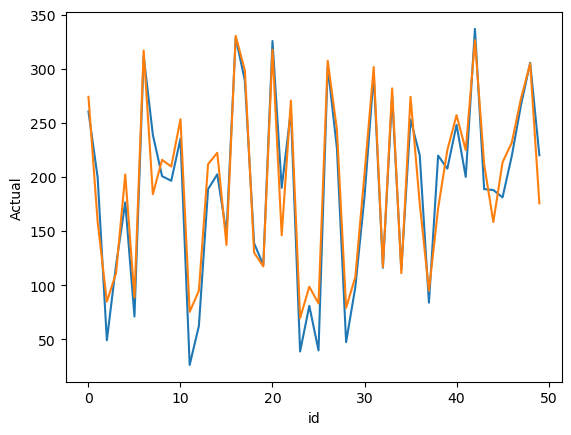

In [114]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [117]:
list(X_test)

['Battery Level (%)',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Make_BMW',
 'Make_Polestar',
 'Make_Tesla1',
 'Make_Tesla2',
 'Make_Volkswagen',
 'Drive_AWD',
 'Drive_Front',
 'Drive_Rear']

In [119]:
import pickle
pickle.dump(Model,open('model.pkl','wb'))

In [121]:
model = pickle.load(open('model.pkl','rb'))

In [123]:
r1 = [[15,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]]
hh = model.predict(r1)
print(hh)

[69.5]


C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
